## Diabetes Case Study
With 8 predictor variables we need to predict whether a particular patient will have diabetes or not.

### Importing Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing all datasets
data = pd.read_csv("diabetes-2.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Inspecting the Dataframe

In [4]:
# Let's check the dimensions of the dataframe
data.shape

(768, 9)

In [5]:
# let's look at the statistical aspects of the dataframe
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Let's see the type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Checking for Outliers

In [7]:
# Checking for outliers in the continuous variables
num_data = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [8]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
90%,9.000000,167.000000,88.000000,40.000000,210.000000,41.500000,0.878600,51.000000
95%,10.000000,181.000000,90.000000,44.000000,293.000000,44.395000,1.132850,58.000000
99%,13.000000,196.000000,106.000000,51.330000,519.900000,50.759000,1.698330,67.000000


#### Checking for Missing Values and Inputing Them

In [9]:
for column_name in data.columns[1:-3]:
    column = data[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    frequency=(count/len(column))*100
    print('Zeros in ', column_name, ' is : ', count,' and frequency is :', frequency)

Zeros in  Glucose  is :  5  and frequency is : 0.6510416666666667
Zeros in  BloodPressure  is :  35  and frequency is : 4.557291666666666
Zeros in  SkinThickness  is :  227  and frequency is : 29.557291666666668
Zeros in  Insulin  is :  374  and frequency is : 48.69791666666667
Zeros in  BMI  is :  11  and frequency is : 1.4322916666666665


1. We have excluded columns Pregancy, Age,Outcome and DiabetesPedigreeFunction as for Pregnancy and Outcome we can expect a zero value.
2. For Age and DiabetesPedigreeFunction we have no 0 value

In [10]:
data["Glucose"] = data["Glucose"].replace(0, np.nan)
data["BloodPressure"] = data["BloodPressure"].replace(0, np.nan)
data["SkinThickness"] = data["SkinThickness"].replace(0, np.nan)
data["Insulin"] = data["Insulin"].replace(0, np.nan)
data["BMI"] = data["BMI"].replace(0, np.nan)

In [11]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [13]:
### fillna function helps to fill the NAN or missing values with the values desired

data['Glucose']=data['Glucose'].fillna(data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].fillna(data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].fillna(data['SkinThickness'].mean())
data['Insulin']=data['Insulin'].fillna(data['Insulin'].mean())
data['BMI']=data['BMI'].fillna(data['BMI'].mean())

In [14]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

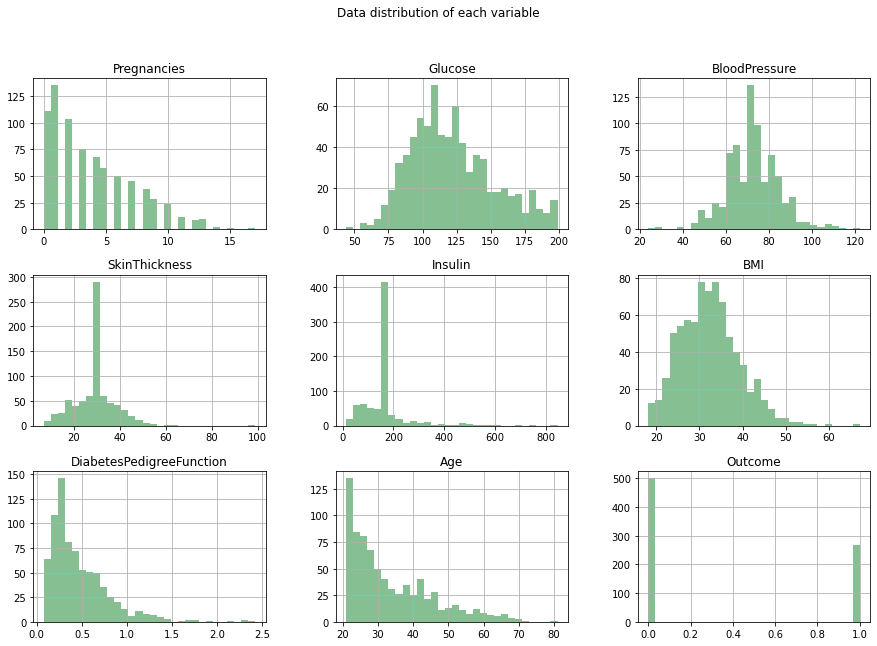

In [15]:
## histogram wil give us a bar plot showing the distribution of variable 
## df.hist has an inbuilt function to give subplots since we are mentioning the different columns 

data.hist(column=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], bins=30, grid=True, figsize=(15,10), color='#86bf91')
plt.suptitle('Data distribution of each variable')
plt.show()

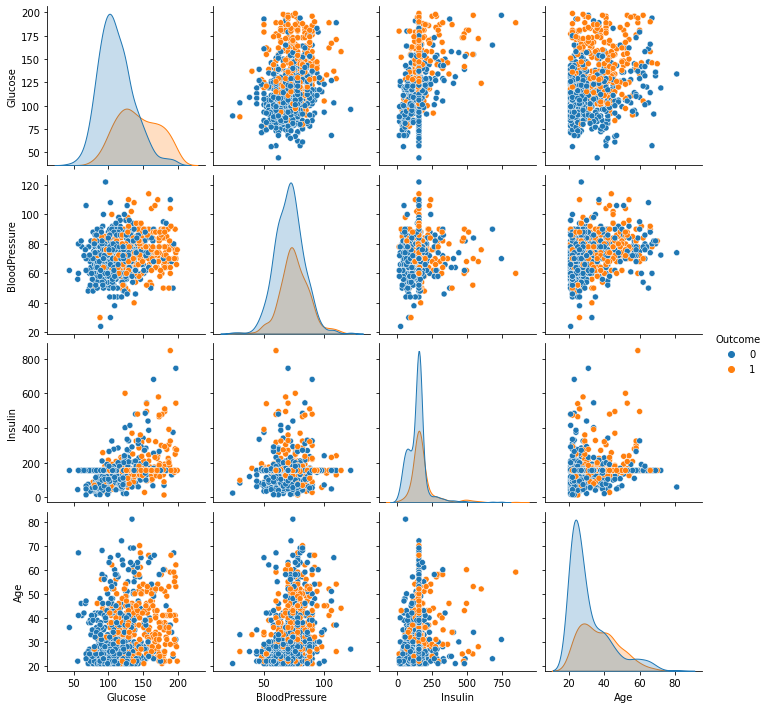

In [16]:
## sns.pairplot helps us with pairwise plot analysis
vars = ['Glucose', 'BloodPressure','Insulin','Age']

# Create the pair plot
sns.pairplot(data=data, x_vars=vars, y_vars=vars, hue='Outcome')

# Show the plot
plt.show()

In [17]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

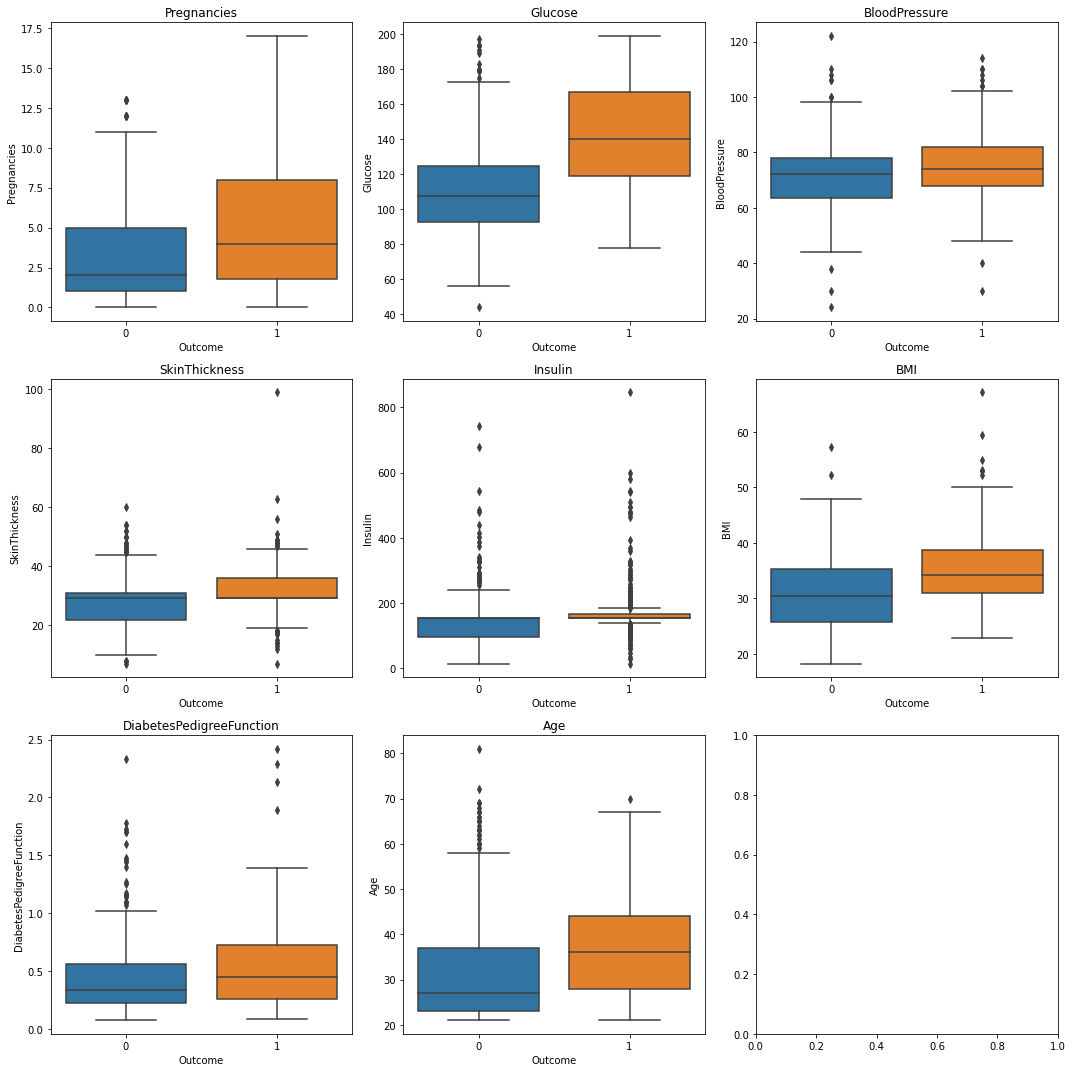

In [18]:
# Boxplot of each variable by outcome
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))
for i, col in enumerate(columns[:-1]):
    row_idx = i // 3
    col_idx = i % 3
    sns.boxplot(x='Outcome', y=col, data=data, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(col)
plt.tight_layout()
plt.show()

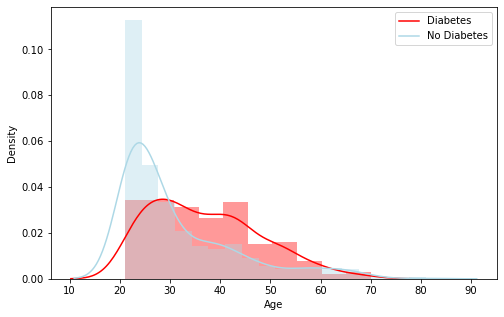

In [19]:
def distribution(col):
    plt.figure(figsize=(8,5))
    ax = sns.distplot(data[col][data.Outcome == 1], color ="red")
    sns.distplot(data[col][data.Outcome == 0], color ="lightblue")
    plt.legend(['Diabetes', 'No Diabetes'])

distribution('Age')
plt.show()

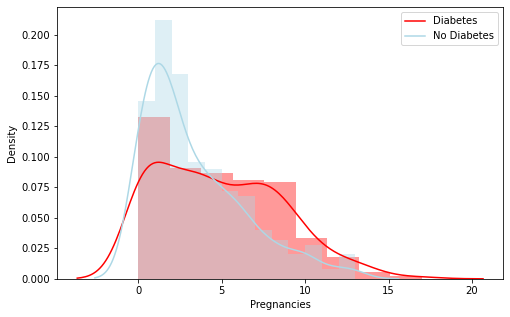

In [20]:
distribution("Pregnancies")

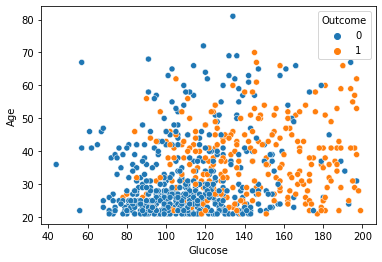

In [21]:
# Create scatter plot with age and glucose columns
sns.scatterplot(x='Glucose', y='Age', hue='Outcome', data=data)
plt.show()

In [22]:
cols = [ 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'] 

# .quantile function gives the quantile value as needed 

Q1 = data[cols].quantile(0.25) 
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1

data1 = data[~((data[cols] < (Q1 )) |(data[cols] > (Q3 ))).any(axis=1)]
data1.shape

(14, 9)

##### data1 has the ouliers removed data. 
    1.However on inspection we can see that the shape of df1 has changed from (768, 9) to (12,9) which is absurd. 
    2.Removing the outliers in that way is not going to help our analysis and we cannot get good inference.

### We will continue out analysis with the existing data without outlier removal

### Step 4: Test-Train Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# Putting feature variable to X
X = data.drop(['Outcome'], axis=1)

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33


In [25]:
# Putting response variable to y
y = data['Outcome']

y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [26]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=29)

### Step 5: Feature Scaling

Scaling does not affect the model. Therefore, it is very important to rescale variables to have equivalent scales. In the absence of comparable scales, some coefficients obtained by fitting a regression model may be very large or very small compared to others. Therefore, it is recommended to use standardisation or normalisation so that the units of the coefficients captured are all on the equivalent scale. As you know, there are two general types of rescaling:

1. Min-Max scaling
2. Standardisation (mean-0, sigma-1)
3. For this problem we will use standardisation scaling.

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

X_train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = scaler.fit_transform(X_train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']])

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
763,1.872199,-0.671145,0.291367,2.230179,0.283500,0.041404,-0.889039,2.473158
392,-0.860612,0.310640,-0.683252,-1.787844,3.041952,-1.256667,-0.266480,-1.036538
424,1.264908,0.965163,0.453804,0.339345,0.635643,1.452352,0.096203,0.216925
114,0.961262,1.259699,-1.495435,0.339345,0.224810,-0.297223,0.301819,0.467617
62,0.353971,-2.536537,-0.845689,0.002944,-0.003517,-1.073244,0.298963,0.216925


In [29]:
### Checking the Churn Rate
outcome = (sum(data['Outcome'])/len(data['Outcome'].index))*100
outcome

34.89583333333333

We have almost 35% churn rate

### Step 6: Looking at Correlations

In [30]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

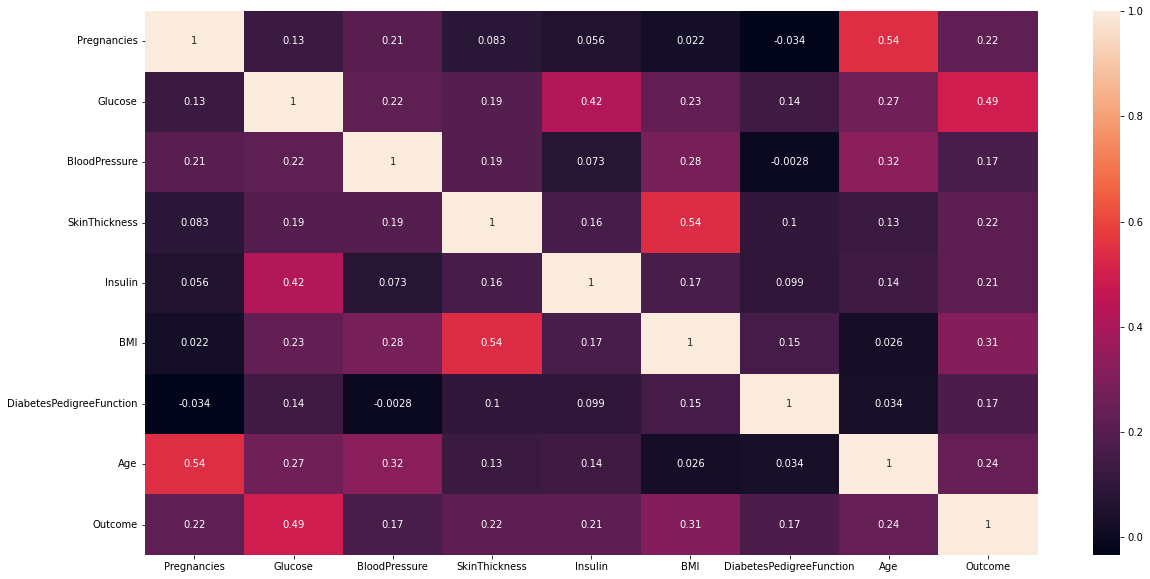

In [31]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(data.corr(),annot = True)
plt.show()

We see from the correlation plots that there are no variables that are highly correlated to each other.

# LOGISTICS REGRESSION MODEL

#### Running Your First Training Model

In [32]:
import statsmodels.api as sm

In [33]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Outcome   No. Observations:                  537
Model:                            GLM   Df Residuals:                      528
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -251.65
Date:                Fri, 21 Apr 2023   Deviance:                       503.30
Time:                        09:10:27   Pearson chi2:                     497.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2975
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Step 8: Feature Selection Using RFE

First, we imported the logistic regression library from sklearn and created a logistic regression object. Then run an RFE on the dataset. In this case, we first select 6 features.

In [34]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [35]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=6)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [36]:
rfe.support_

array([ True,  True, False,  True,  True,  True,  True, False])

In [37]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Pregnancies', True, 1),
 ('Glucose', True, 1),
 ('BloodPressure', False, 2),
 ('SkinThickness', True, 1),
 ('Insulin', True, 1),
 ('BMI', True, 1),
 ('DiabetesPedigreeFunction', True, 1),
 ('Age', False, 3)]

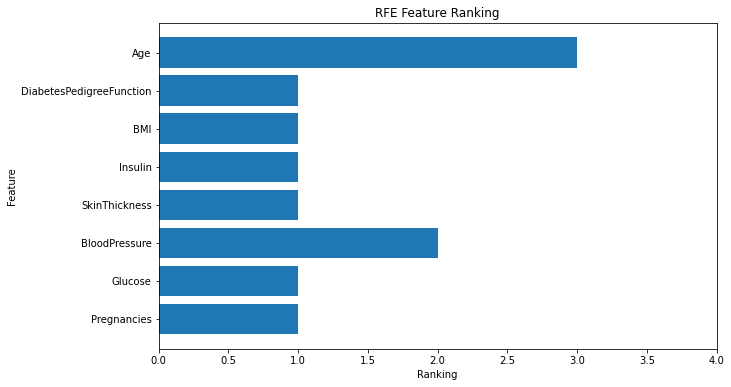

In [38]:
# Zip the column names, support, and ranking into a list of tuples
features = list(zip(X_train.columns, rfe.support_, rfe.ranking_))

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Create a horizontal bar plot of the feature ranking
ax.barh([f[0] for f in features], [f[2] for f in features], align='center')

# Set the x-axis limits
ax.set_xlim(0, max(rfe.ranking_) + 1)

# Set the axis labels and title
ax.set_xlabel('Ranking')
ax.set_ylabel('Feature')
ax.set_title('RFE Feature Ranking')

# Show the plot
plt.show()



In [39]:
col = X_train.columns[rfe.support_]

In [40]:
X_train.columns[~rfe.support_]

Index(['BloodPressure', 'Age'], dtype='object')

##### Assessing the model with StatsModels

In [41]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Outcome   No. Observations:                  537
Model:                            GLM   Df Residuals:                      530
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -251.83
Date:                Fri, 21 Apr 2023   Deviance:                       503.65
Time:                        09:10:27   Pearson chi2:                     498.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2970
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [42]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

763    0.307517
392    0.099502
424    0.842511
114    0.697727
62     0.014097
519    0.134055
171    0.532839
557    0.211821
628    0.387323
597    0.058412
dtype: float64

In [43]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30751666, 0.09950214, 0.84251122, 0.69772673, 0.01409693,
       0.1340554 , 0.53283944, 0.21182145, 0.38732349, 0.05841203])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [44]:
y_train_pred_final = pd.DataFrame({'Outcome':y_train.values, 'Outcome_Prob':y_train_pred})
y_train_pred_final.head()

,Outcome,Outcome_Prob
0,0,0.307517
1,0,0.099502
2,1,0.842511
3,1,0.697727
4,0,0.014097


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [45]:
y_train_pred_final['predicted'] = y_train_pred_final.Outcome_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Outcome,Outcome_Prob,predicted
0,0,0.307517,0
1,0,0.099502,0
2,1,0.842511,1
3,1,0.697727,1
4,0,0.014097,0


In [46]:
from sklearn import metrics

In [47]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Outcome, y_train_pred_final.predicted )
print(confusion)

[[312  39]
 [ 80 106]]


In [48]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Outcome, y_train_pred_final.predicted))

0.7783985102420856


#### Checking VIFs

In [49]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,BMI,1.55
2,SkinThickness,1.52
1,Glucose,1.33
3,Insulin,1.25
5,DiabetesPedigreeFunction,1.05
0,Pregnancies,1.04


### Step 11: Making predictions on the test set

In [51]:
X_test[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = scaler.transform(X_test[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']])

In [52]:
X_test = X_test[col]
X_test.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
280,-1.164258,0.801532,0.002944,-0.003517,0.746878,-0.423548
6,-0.253321,-1.423847,0.339345,-0.796404,-0.226676,-0.669145
462,1.264908,-1.554752,1.284762,-1.254189,0.380032,0.635944
53,1.264908,1.783318,0.575699,1.692071,0.154280,-0.043730
365,0.353971,-0.736598,-0.133364,-0.855094,0.196608,0.047655


In [53]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [54]:
y_test_pred = res.predict(X_test_sm)

In [55]:
y_test_pred[:10]

280    0.489167
6      0.060316
462    0.180248
53     0.839855
365    0.206895
137    0.061901
269    0.315718
254    0.183447
549    0.803313
357    0.786784
dtype: float64

In [56]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [57]:
# Let's see the head
y_pred_1.head()

,0
280,0.489167
6,0.060316
462,0.180248
53,0.839855
365,0.206895


In [58]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [59]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [60]:
y_pred_final.head()

,Outcome,0
280,1,0.489167
6,1,0.060316
462,0,0.180248
53,1,0.839855
365,0,0.206895


In [61]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Outcome_Prob'})

In [62]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Outcome,Outcome_Prob
280,1,0.489167
6,1,0.060316
462,0,0.180248
53,1,0.839855
365,0,0.206895


In [63]:
y_pred_final['final_predicted'] = y_pred_final.Outcome_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [64]:
y_pred_final.head()

,Outcome,Outcome_Prob,final_predicted
280,1,0.489167,0
6,1,0.060316,0
462,0,0.180248,0
53,1,0.839855,1
365,0,0.206895,0


In [65]:
# Let's check the overall accuracy.
logreg_accuracy=metrics.accuracy_score(y_pred_final.Outcome, y_pred_final.final_predicted)
logreg_accuracy

0.7575757575757576

In [66]:
confusion2 = metrics.confusion_matrix(y_pred_final.Outcome, y_pred_final.final_predicted )
confusion2

array([[132,  17],
       [ 39,  43]])

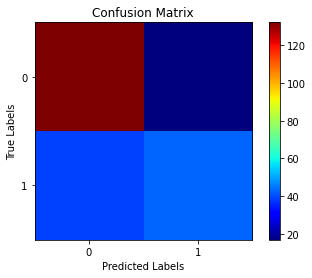

In [67]:
# Plot confusion matrix as heatmap
plt.imshow(confusion2, cmap='jet')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks([0,1])
plt.yticks([0,1])
plt.title('Confusion Matrix')
plt.show()

In [68]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [69]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.524390243902439

In [70]:
# Let us calculate specificity
TN / float(TN+FP)

0.8859060402684564